In [12]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit_aer import Aer
from qiskit import transpile

# The quantum teleportation circuit to be used

- Initializing the circuit with 3 qubits and 2 classical bits

In [48]:
qc_teleport = QuantumCircuit(3, 2)

- Entangling the two qubits, one initialized by Alice and the other by Bob

In [49]:
qc_teleport.h(1)
qc_teleport.cx(1, 2)
qc_teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [50]:
qc_teleport.cx(0, 1)
qc_teleport.h(0)
qc_teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

- Measurement on Alice's side

In [51]:
qc_teleport.measure(0, 0)
qc_teleport.measure(1, 1)

- Transformation applied by Bob on his qubit conditioned on the recieved classical bits

In [52]:
qc_teleport.cx(1, 2)
qc_teleport.cz(0, 2)
qc_teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

- Visualizing the circuit

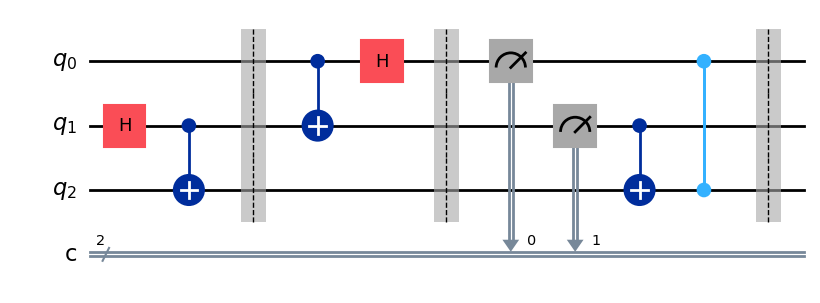

In [53]:
qc_teleport.draw("mpl")

# Visulaizing the state to be sent on a Bloch sphere

<IPython.core.display.Latex object>

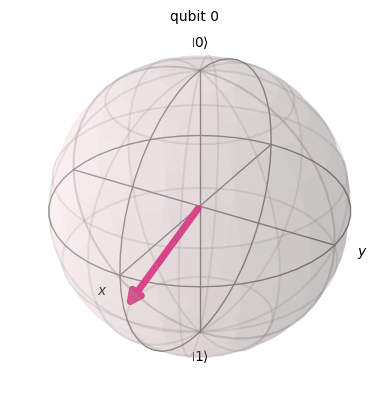

In [19]:
#ALICE'S state
psi = [0.6,  0.8] #state to be sent
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi) #display psi on a bloch sphere

# Simulating the circuit for $|\psi\rangle = 0.6|0\rangle + 0.8|1\rangle$

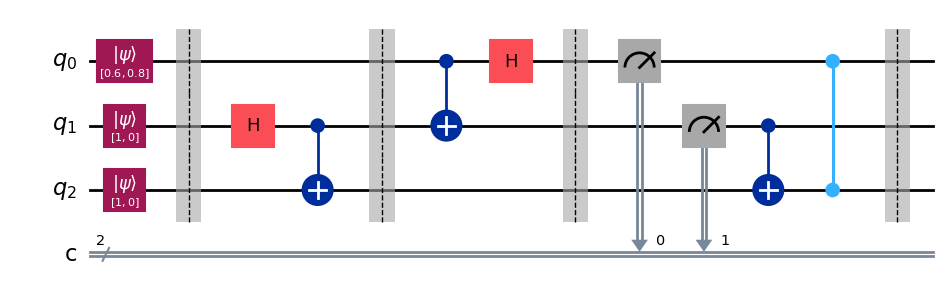

In [114]:
qc_teleport = QuantumCircuit(3, 2)

# State initialization 
qc_teleport.append(Initialize(psi), [0]) # Alice's initialization
qc_teleport.append(Initialize([1, 0]), [1]) # Alice's initialization
qc_teleport.append(Initialize([1, 0]), [2]) # Bob's initialization
qc_teleport.barrier()

# Bell state Creation
qc_teleport.h(1)
qc_teleport.cx(1, 2)
qc_teleport.barrier()

qc_teleport.cx(0, 1)
qc_teleport.h(0)
qc_teleport.barrier()

# Measurement on Alice's side
qc_teleport.measure(0, 0)
qc_teleport.measure(1, 1)

# Transformation applied by Bob on his qubit conditioned on the recieved classical bits
qc_teleport.cx(1, 2)
qc_teleport.cz(0, 2)
qc_teleport.barrier()

# Visualizing the circuit
qc_teleport.draw("mpl")


# Final simulation and Bloch sphere visualization of what Bob recieves

-- NOTE: Run this code only once, repetitive runs will lead to conflicts

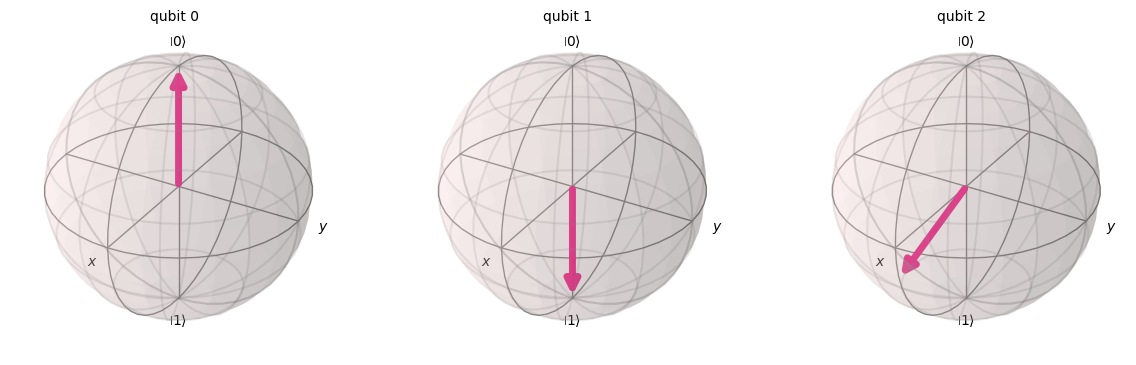

In [86]:
#what BOB recieves
sim = Aer.get_backend('aer_simulator')
qc_teleport.save_statevector()
sim_result = sim.run(qc_teleport).result()
out_vector = sim_result.get_statevector()
plot_bloch_multivector(out_vector)

# Getting a histogram for the state vector

In [87]:
qc_teleport_measure = QuantumCircuit(3, 3)

# State initialization 
qc_teleport_measure.append(Initialize(psi), [0]) # Alice's initialization
qc_teleport_measure.append(Initialize([1, 0]), [1]) # Alice's initialization
qc_teleport_measure.append(Initialize([1, 0]), [2]) # Bob's initialization
qc_teleport_measure.barrier()

# Bell state Creation
qc_teleport_measure.h(1)
qc_teleport_measure.cx(1, 2)
qc_teleport_measure.barrier()

qc_teleport_measure.cx(0, 1)
qc_teleport_measure.h(0)
qc_teleport_measure.barrier()

# Measurement on Alice's side
qc_teleport_measure.measure(0, 0)
qc_teleport_measure.measure(1, 1)

# Transformation applied by Bob on his qubit conditioned on the recieved classical bits
qc_teleport_measure.cx(1, 2)
qc_teleport_measure.cz(0, 2)
qc_teleport_measure.barrier()

#measuring the state recieved by Bob 
qc_teleport_measure.measure(2, 2)

#Simulating the circuit 
sim = Aer.get_backend('aer_simulator')
qc_teleport_measure.save_statevector()
sim_result = sim.run(qc_teleport_measure).result()
counts = sim_result.get_counts()

## Histogram

Recieved Alpha = 0.6187184335382291
Recieved Beta = 0.7856128181235335


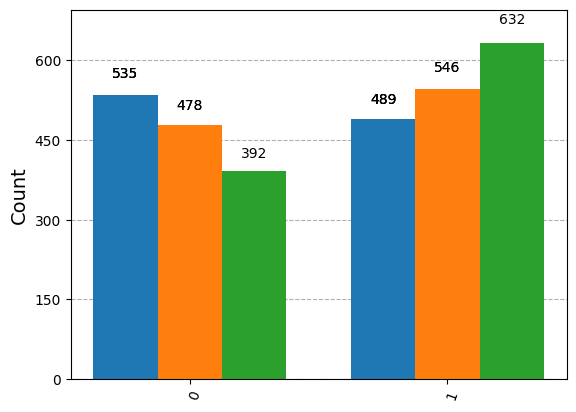

In [103]:
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
print(f"Recieved Alpha = {np.sqrt(qubit_counts[2]['0']/(qubit_counts[2]['0'] + qubit_counts[2]['1']))}\nRecieved Beta = {np.sqrt(qubit_counts[2]['1']/(qubit_counts[2]['0'] + qubit_counts[2]['1']))}")
plot_histogram(qubit_counts)

# Observation
- From the simulation, at Bob's end the recieved state is almost $0.6|0\rangle + 0.8|1\rangle$.
- The coefficients experience a very small (~$10^{-16}$) complex noise.

# Simulating the circuit on the IBMQ backend

In [1]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.primitives import StatevectorEstimator

### Saving the code (token has been masked)

In [4]:
QiskitRuntimeService.save_account(
  token='--private--',
  channel="ibm_quantum",
  overwrite=True
)

### Circuit

In [5]:
psi = [0.6, 0.8]

qc_teleport_hardware = QuantumCircuit(3, 3)

# State initialization 
qc_teleport_hardware.append(Initialize(psi), [0]) # Alice's initialization
qc_teleport_hardware.append(Initialize([1, 0]), [1]) # Alice's initialization
qc_teleport_hardware.append(Initialize([1, 0]), [2]) # Bob's initialization
qc_teleport_hardware.barrier()

# Bell state Creation
qc_teleport_hardware.h(1)
qc_teleport_hardware.cx(1, 2)
qc_teleport_hardware.barrier()

qc_teleport_hardware.cx(0, 1)
qc_teleport_hardware.h(0)
qc_teleport_hardware.barrier()

# Measurement on Alice's side
qc_teleport_hardware.measure(0, 0)
qc_teleport_hardware.measure(1, 1)

# Transformation applied by Bob on his qubit conditioned on the recieved classical bits
qc_teleport_hardware.cx(1, 2)
qc_teleport_hardware.cz(0, 2)

qc_teleport_hardware.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

### Setting up the observables

In [7]:
observables_labels = ["IIZ", "IZZ", "ZZZ"]
observables = [SparsePauliOp(label) for label in observables_labels]

### Accessing the least busy backend

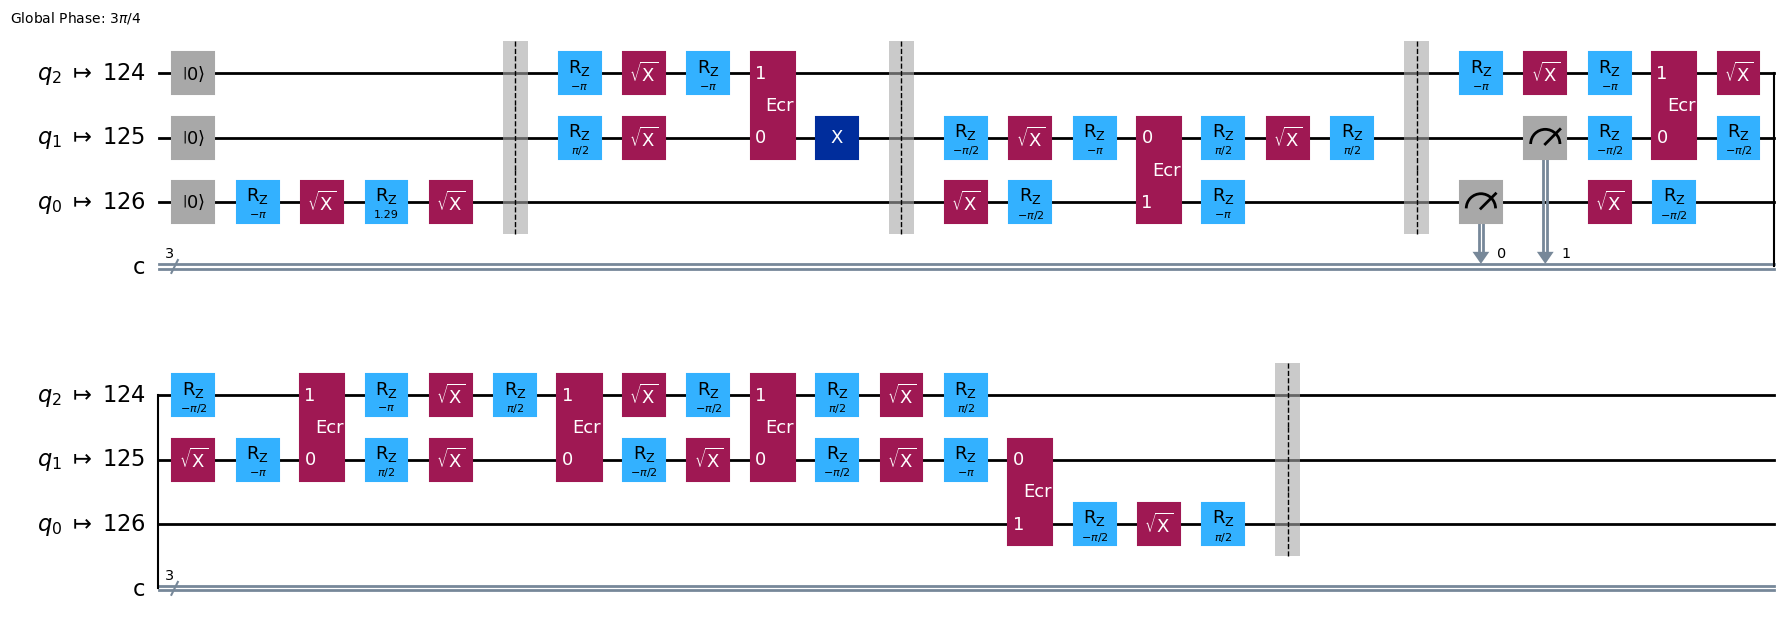

In [8]:
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc_teleport_hardware)
 
isa_circuit.draw("mpl", idle_wires=False)

### Applying the operators to the circuit output 

In [10]:
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
job_result = job.result()
pub_result = job.result()[0]

### Plotting the operation results

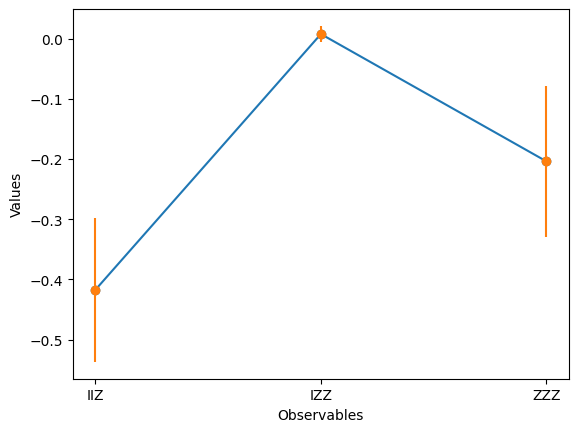

In [15]:
values = pub_result.data.evs
errors = pub_result.data.stds
 
plt.plot(observables_labels, values, "-o")
plt.errorbar(observables_labels, values, yerr= errors, fmt = 'o')
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

# References:
- For help accessing ibm quantum runtime: [Link](https://github.com/Qiskit/qiskit-aer/issues/2071)